# Modelo de Regressão (CinemaTicketRef Dataset)

In [50]:
#notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


### Objetivo:
Tentar prever o preço total de vendas com base em outras variáveis

In [51]:
df = pd.read_csv('datasets/cinematicket_ref.csv', sep=",", header=0)

# tratamento de dados

missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print((total_missing/total_cells) * 100)

print(df.isnull().sum())

# vamos remover os dados onde apresentam valores NULL, (nao sei se vale a pena, mas como apresenta uma pouca porcentagme dos dados acho que nao faria muita diferenca)

df.dropna(inplace=True)

cinema={}
cinema["features"] = np.hstack([df.values[::, :2], df.values[::, 3:9]])
cinema["target"] = df.values[:, 2]

#passando de 1D para 2D
# cinema['features'].reshape(-1,1)
# cinema['target'].reshape(-1,1)

print(cinema['features'].shape)
print(cinema['target'].shape)

0.012529218136694772
film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64
(142399, 8)
(142399,)


(99679, 8)
(99679,)
Mean squared error: 111322175736359.62
Coefficient of determination: 0.87


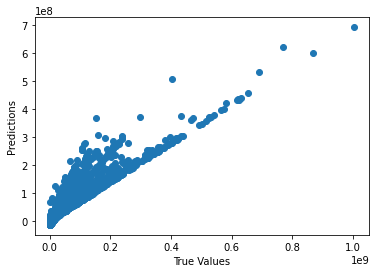

Coefficients: 
 [-11079.56633949   8907.43498949  58520.26162377  15225.58937449
  54874.58057239 -91166.62271012    167.88279841  43294.67224927]
Intercept: 
 28280.39206313528
Score: 
 0.8739174733371569
Model: 
 LinearRegression()
scores: 
 [-1.10760637e+14 -1.10056124e+14 -1.22945911e+14 -1.06034445e+14
 -1.10605198e+14 -1.11475381e+14 -1.09795706e+14]
-111667628967391.17
4884696065816.795


In [52]:
def regression_analysis(target, features):
    # split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
    print(x_train.shape)
    print(y_train.shape)

    # train the model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # make predictions
    y_pred = model.predict(x_test)

    # evaluate the model
    from sklearn.metrics import mean_squared_error, r2_score
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

    # plot the results
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

    # print the coefficients
    print('Coefficients: \n', model.coef_)
    # print the intercept
    print('Intercept: \n', model.intercept_)
    # print the score
    print('Score: \n', model.score(x_test, y_test))
    # print the model
    print('Model: \n', model)
    
    from sklearn.model_selection import cross_val_score
    
    scores = cross_val_score(model, x_test, y_test, cv=7, scoring='neg_mean_squared_error')
    print('scores: \n', scores)
    
    print(scores.mean())
    print(scores.std())

regression_analysis(cinema["target"], cinema["features"])


## Utilizando outros modelos de Regressão Linear para verificar o resultado

In [53]:
def norma_l2(X):
    X = X.astype(int)
    X = X - np.mean(X, axis=0)
    X = X / np.linalg.norm(X, axis=0)
    return X

### Lasso Regression

In [54]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.01)

ls_scores = cross_val_score(ls, norma_l2(cinema["features"]), cinema["target"], cv=7)

print('ls score: ', ls_scores.mean())


ls score:  0.833869671334205


### Ridge Regression

In [55]:
from sklearn.linear_model import Ridge


rg = Ridge(alpha=0.05)
lr = LinearRegression()

lr_scores = cross_val_score(lr, norma_l2(cinema["features"]), cinema["target"], cv=7,)
print(lr_scores)
print('lr mean scores: ', lr_scores.mean())

rg_scores = cross_val_score(rg, norma_l2(cinema["features"]), cinema["target"], cv=7)
print('rg mean scores: ', rg_scores.mean())

from sklearn.linear_model import RidgeCV

rg = RidgeCV(alphas=(1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025))
rg.fit(norma_l2(cinema["features"]), cinema["target"])

print('rg alpha: ', rg.alpha_)

[0.8115784  0.71681664 0.8471377  0.89447356 0.869001   0.826857
 0.870684  ]
lr scores:  0.8337926119378851
rg scores:  0.8390760371863585
rg alpha:  0.00025


### ElasticNet Regression

In [56]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

en = ElasticNet(alpha=0.001, l1_ratio=0.8)
en_scores = cross_val_score(en, norma_l2(cinema["features"]), cinema["target"], cv=10)

print('ElasticNet mean scores: ',en_scores.mean())

encv = ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8))
encv.fit(norma_l2(cinema["features"]), cinema["target"])

print(encv.alpha_)
print(encv.l1_ratio_)

0.06055906094845577
